In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/1번설문/change_bright.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	117 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 3 3 3 1 1 1 ...
 $ interest   : int  5 5 3 3 4 2 5 3 4 4 ...
 $ comp       : int  4 1 2 5 4 3 1 1 1 5 ...
 $ triangle1  : int  5 1 4 5 2 4 4 1 4 5 ...
 $ triangle2  : int  2 2 1 4 1 1 5 3 1 2 ...
 $ doubleness1: int  3 2 2 5 1 2 3 1 1 2 ...
 $ doubleness2: int  2 3 1 4 2 2 3 5 2 1 ...
 $ doubleness3: int  2 2 2 1 2 2 3 5 2 5 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


In [4]:
survey$comp1 <- case_when(
    survey$comp == 1 ~ 1,
    survey$comp != 1 ~ 0)

survey$comp2 <- case_when(
    survey$comp == 2 ~ 1,
    survey$comp != 2 ~ 0)

survey$comp3 <- case_when(
    survey$comp == 3 ~ 1,
    survey$comp != 3 ~ 0)

survey$comp4 <- case_when(
    survey$comp == 4 ~ 1,
    survey$comp != 4 ~ 0)

survey$comp5 <- case_when(
    survey$comp == 5 ~ 1,
    survey$comp != 5 ~ 0)

survey$t1_1 <- case_when(
    survey$triangle1 == 1 ~ 1,
    survey$triangle1 != 1 ~ 0)

survey$t1_2 <- case_when(
    survey$triangle1 == 2 ~ 1,
    survey$triangle1 != 2 ~ 0)

survey$t1_3 <- case_when(
    survey$triangle1 == 3 ~ 1,
    survey$triangle1 != 3 ~ 0)

survey$t1_4 <- case_when(
    survey$triangle1 == 4 ~ 1,
    survey$triangle1 != 4 ~ 0)

survey$t1_5 <- case_when(
    survey$triangle1 == 5 ~ 1,
    survey$triangle1 != 5 ~ 0)
	
survey$t2_1 <- case_when(
    survey$triangle2 == 1 ~ 1,
    survey$triangle2 != 1 ~ 0)

survey$t2_2 <- case_when(
    survey$triangle2 == 2 ~ 1,
    survey$triangle2 != 2 ~ 0)

survey$t2_3 <- case_when(
    survey$triangle2 == 3 ~ 1,
    survey$triangle2 != 3 ~ 0)

survey$t2_4 <- case_when(
    survey$triangle2 == 4 ~ 1,
    survey$triangle2 != 4 ~ 0)

survey$t2_5 <- case_when(
    survey$triangle2 == 5 ~ 1,
    survey$triangle2 != 5 ~ 0)
	
survey$d1_1 <- case_when(
    survey$doubleness1 == 1 ~ 1,
    survey$doubleness1 != 1 ~ 0)

survey$d1_2 <- case_when(
    survey$doubleness1 == 2 ~ 1,
    survey$doubleness1 != 2 ~ 0)

survey$d1_3 <- case_when(
    survey$doubleness1 == 3 ~ 1,
    survey$doubleness1 != 3 ~ 0)

survey$d1_4 <- case_when(
    survey$doubleness1 == 4 ~ 1,
    survey$doubleness1 != 4 ~ 0)

survey$d1_5 <- case_when(
    survey$doubleness1 == 5 ~ 1,
    survey$doubleness1 != 5 ~ 0)
	
survey$d2_1 <- case_when(
    survey$doubleness2 == 1 ~ 1,
    survey$doubleness2 != 1 ~ 0)

survey$d2_2 <- case_when(
    survey$doubleness2 == 2 ~ 1,
    survey$doubleness2 != 2 ~ 0)

survey$d2_3 <- case_when(
    survey$doubleness2 == 3 ~ 1,
    survey$doubleness2 != 3 ~ 0)

survey$d2_4 <- case_when(
    survey$doubleness2 == 4 ~ 1,
    survey$doubleness2 != 4 ~ 0)

survey$d2_5 <- case_when(
    survey$doubleness2 == 5 ~ 1,
    survey$doubleness2 != 5 ~ 0)
	
survey$d3_1 <- case_when(
    survey$doubleness3 == 1 ~ 1,
    survey$doubleness3 != 1 ~ 0)

survey$d3_2 <- case_when(
    survey$doubleness3 == 2 ~ 1,
    survey$doubleness3 != 2 ~ 0)

survey$d3_3 <- case_when(
    survey$doubleness3 == 3 ~ 1,
    survey$doubleness3 != 3 ~ 0)

survey$d3_4 <- case_when(
    survey$doubleness3 == 4 ~ 1,
    survey$doubleness3 != 4 ~ 0)

survey$d3_5 <- case_when(
    survey$doubleness3 == 5 ~ 1,
    survey$doubleness3 != 5 ~ 0)

In [5]:
head(survey)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
0,Male,20,harmony,harmony,clothes,5,4,5,2,...,0,1,0,0,0,0,1,0,0,0
1,Female,20,bright,harmony,clothes,5,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,Female,20,bright,bright,clothes,3,2,4,1,...,1,0,0,0,0,0,1,0,0,0
3,Female,20,harmony,harmony,clothes,3,5,5,4,...,0,0,0,1,0,1,0,0,0,0
4,Female,20,bright,bright,etc,4,4,2,1,...,0,1,0,0,0,0,1,0,0,0
5,Female,20,harmony,harmony,etc,2,3,4,1,...,0,1,0,0,0,0,1,0,0,0


In [6]:
train <- survey[1:82, ]
test <- survey[83:117, ]

In [7]:
model <- glm(comp1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3117  -0.9902  -0.7694   1.1187   1.9909  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.511345   1.167017  -2.152   0.0314 *
sexMale           -0.394571   0.692242  -0.570   0.5687  
definitionharmony  0.304199   0.660180   0.461   0.6450  
needharmony        0.977522   0.584885   1.671   0.0947 .
purposecosmetic   -0.217876   0.729561  -0.299   0.7652  
purposeetc         0.003857   0.609881   0.006   0.9950  
interest           0.384019   0.252495   1.521   0.1283  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.53  on 81  degrees of freedom
Residual deviance: 103.28  on 75  degrees of freedom
AIC: 117.28

Number of Fisher Scoring iterations: 4


In [8]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,110.5341,NA
sex,1,0.01765653,80,110.5164,0.89428996
definition,1,1.49059270,79,109.0258,0.22212452
need,1,3.21671695,78,105.8091,0.07288968
purpose,2,0.09965430,76,105.7094,0.95139386
interest,1,2.43157834,75,103.2779,0.11891311


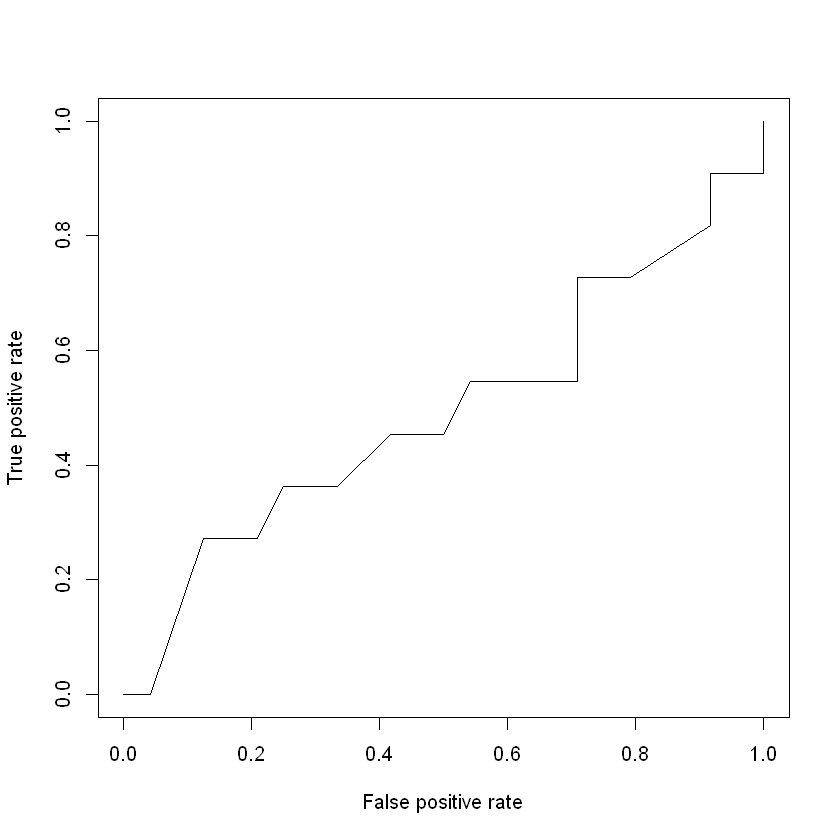

In [9]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [10]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.4943182


Call:
glm(formula = comp2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8950  -0.6924  -0.4765  -0.3774   2.3332  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.68117    1.37622  -0.495    0.621
sexMale            0.25881    0.92306   0.280    0.779
definitionharmony -0.19006    0.79799  -0.238    0.812
needharmony       -1.15767    0.71244  -1.625    0.104
purposecosmetic    0.06009    0.91543   0.066    0.948
purposeetc        -0.43351    0.85598  -0.506    0.613
interest          -0.04788    0.31684  -0.151    0.880

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 71.707  on 81  degrees of freedom
Residual deviance: 67.465  on 75  degrees of freedom
AIC: 81.465

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,71.70658,NA
sex,1,0.01131632,80,71.69526,0.91528228
definition,1,0.91809406,79,70.77717,0.33797591
need,1,2.87557306,78,67.90159,0.08993296
purpose,2,0.41428486,76,67.48731,0.81290386
interest,1,0.02279875,75,67.46451,0.87998159


[1] 0.4827586

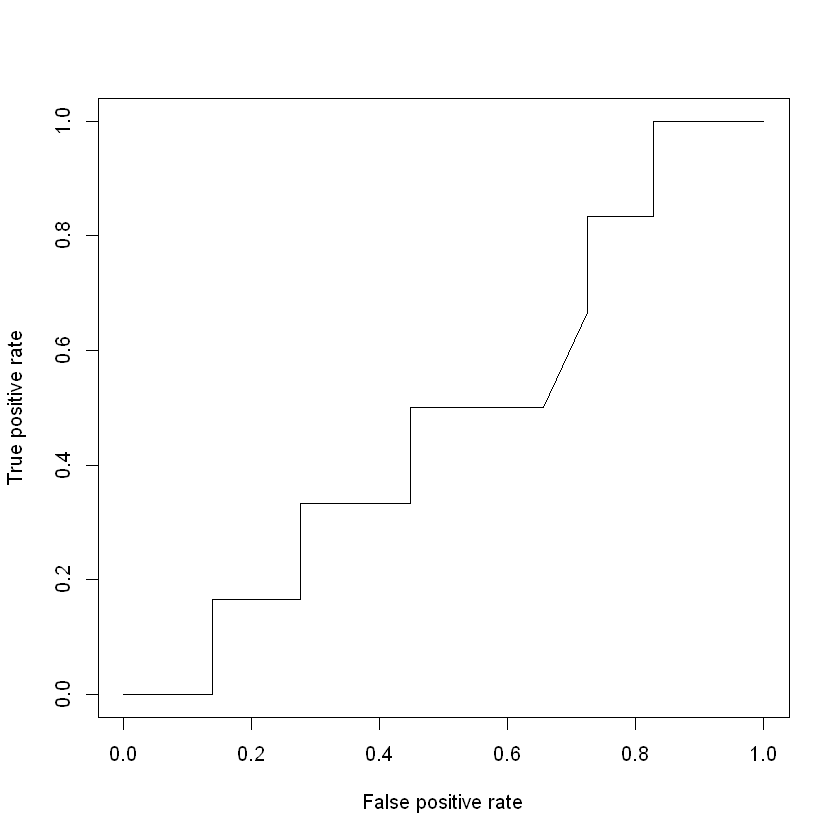

In [11]:
model <- glm(comp2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0982  -0.5886  -0.4340  -0.2698   2.5624  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.2307     1.5169  -0.152   0.8791  
sexMale            -0.9415     1.2886  -0.731   0.4650  
definitionharmony  -0.4821     1.0174  -0.474   0.6356  
needharmony         1.0084     0.9982   1.010   0.3124  
purposecosmetic     0.6913     1.0116   0.683   0.4944  
purposeetc          0.5146     0.9056   0.568   0.5699  
interest           -0.6497     0.3588  -1.811   0.0702 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64.648  on 81  degrees of freedom
Residual deviance: 58.237  on 75  degrees of freedom
AIC: 72.237

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,64.64772,NA
sex,1,1.4485326,80,63.19919,0.2287635
definition,1,0.1271648,79,63.07202,0.7213900
need,1,0.8995308,78,62.17249,0.3429075
purpose,2,0.4379282,76,61.73456,0.8033506
interest,1,3.4979943,75,58.23657,0.0614432


[1] 0.4856322

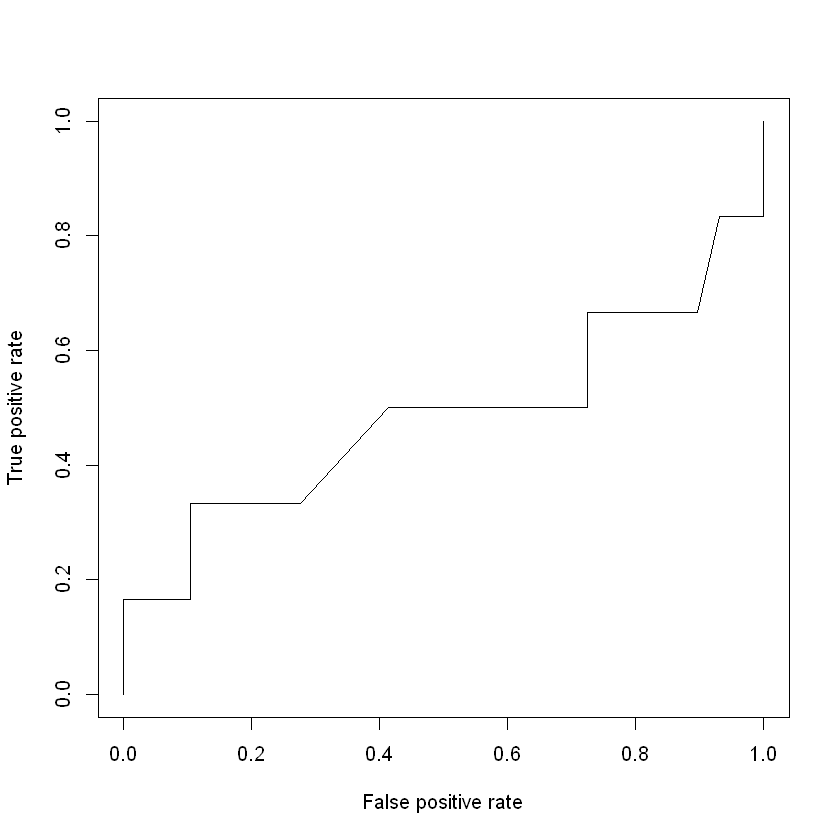

In [12]:
model <- glm(comp3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1017  -0.5306  -0.3447  -0.2701   2.2370  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -0.8437     1.6416  -0.514    0.607  
sexMale             0.7282     1.0344   0.704    0.481  
definitionharmony   0.2864     1.0047   0.285    0.776  
needharmony        -1.7087     0.8754  -1.952    0.051 .
purposecosmetic    -0.7984     1.2937  -0.617    0.537  
purposeetc         -0.1477     1.0143  -0.146    0.884  
interest           -0.1758     0.3807  -0.462    0.644  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 56.745  on 81  degrees of freedom
Residual deviance: 51.010  on 75  degrees of freedom
AIC: 65.01

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,56.74484,NA
sex,1,0.7001004,80,56.04474,0.40274995
definition,1,0.4189143,79,55.62582,0.51747929
need,1,3.9792924,78,51.64653,0.04606291
purpose,2,0.4231424,76,51.22339,0.80931166
interest,1,0.2129760,75,51.01041,0.64444479


[1] 0.266129

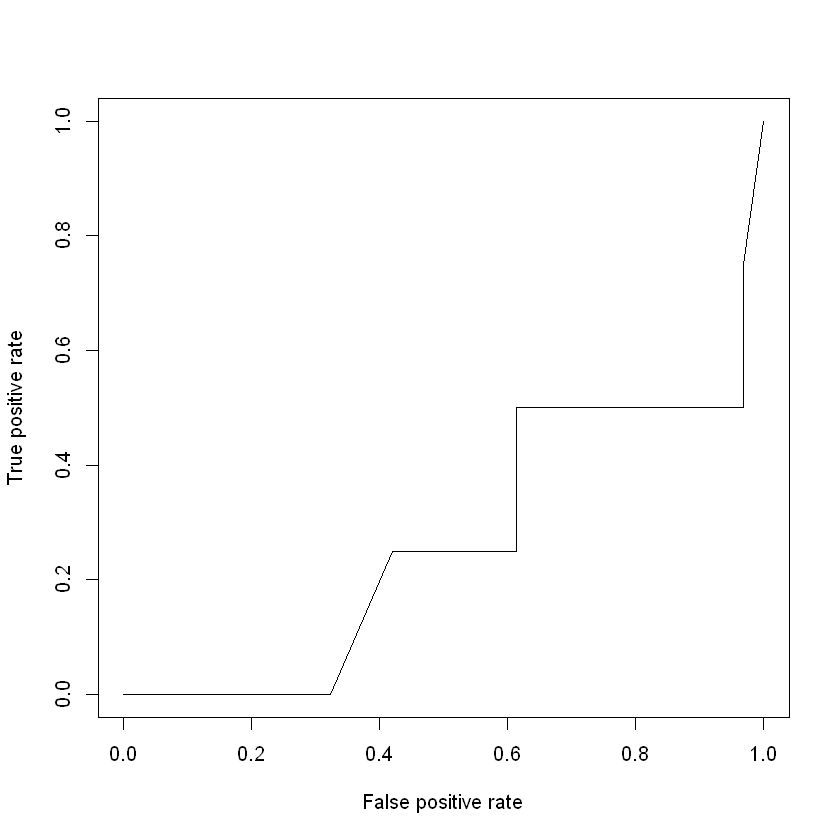

In [13]:
model <- glm(comp4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8429  -0.6886  -0.6321  -0.5979   1.9419  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.53062    1.27908  -1.197    0.231
sexMale            0.31310    0.82122   0.381    0.703
definitionharmony -0.32838    0.75193  -0.437    0.662
needharmony        0.13527    0.68218   0.198    0.843
purposecosmetic    0.06477    0.87840   0.074    0.941
purposeetc         0.03067    0.74118   0.041    0.967
interest           0.04603    0.28486   0.162    0.872

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 80.945  on 81  degrees of freedom
Residual deviance: 80.586  on 75  degrees of freedom
AIC: 94.586

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,80.94469,NA
sex,1,0.10533998,80,80.83935,0.7455132
definition,1,0.17715748,79,80.66219,0.6738275
need,1,0.04279560,78,80.61940,0.8361106
purpose,2,0.00681416,76,80.61258,0.9965987
interest,1,0.02619647,75,80.58639,0.8714214


[1] 0.4583333

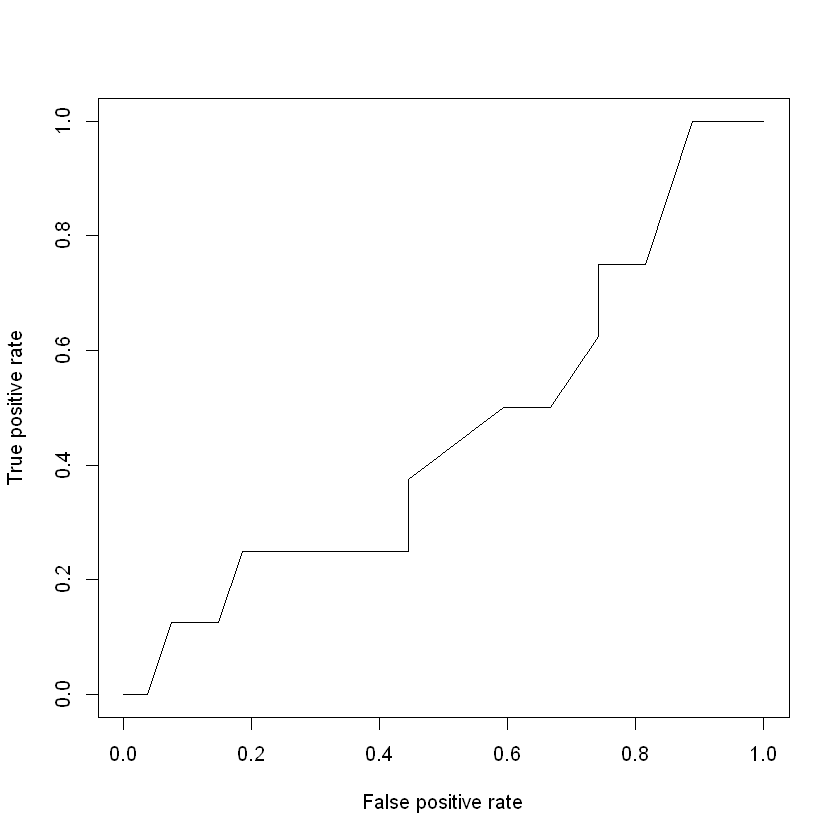

In [14]:
model <- glm(comp5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0697  -0.7045  -0.4128  -0.2553   2.7637  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.5265     1.5949  -2.211   0.0270 *
sexMale             2.5177     1.1514   2.187   0.0288 *
definitionharmony   0.6711     0.9490   0.707   0.4794  
needharmony         0.3117     0.7461   0.418   0.6761  
purposecosmetic     2.1292     1.2320   1.728   0.0839 .
purposeetc          1.5133     1.1552   1.310   0.1902  
interest           -0.1164     0.2917  -0.399   0.6899  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 80.945  on 81  degrees of freedom
Residual deviance: 70.686  on 75  degrees of freedom
AIC: 84.686

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,80.94469,NA
sex,1,4.9074044,80,76.03729,0.0267418
definition,1,1.2070247,79,74.83026,0.2719222
need,1,0.1748306,78,74.65543,0.6758539
purpose,2,3.8106119,76,70.84482,0.1487771
interest,1,0.1585851,75,70.68623,0.6904626


[1] 0.6550926

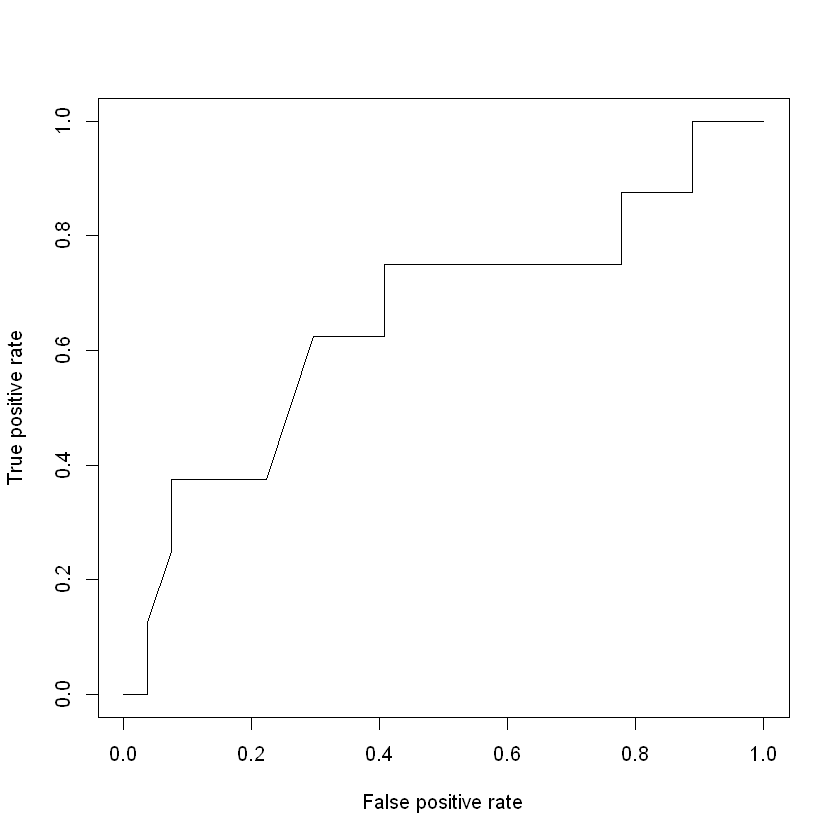

In [15]:
model <- glm(t1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1295  -0.4715  -0.3149  -0.1688   2.6936  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)         0.7648     1.7633   0.434   0.6645  
sexMale             0.6851     1.5030   0.456   0.6485  
definitionharmony  -2.7977     1.1814  -2.368   0.0179 *
needharmony         0.6948     1.0904   0.637   0.5240  
purposecosmetic     0.8595     1.3749   0.625   0.5319  
purposeetc          1.3323     1.1459   1.163   0.2450  
interest           -0.7369     0.4071  -1.810   0.0703 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60.810  on 81  degrees of freedom
Residual deviance: 46.939  on 75  degrees of freedom
AIC: 60.939

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,60.81033,NA
sex,1,1.10586206,80,59.70447,0.292983216
definition,1,7.75623761,79,51.94823,0.005352735
need,1,0.02326362,78,51.92497,0.878773523
purpose,2,1.28833468,76,50.63664,0.525099591
interest,1,3.69736711,75,46.93927,0.054498401


[1] 0.5402299

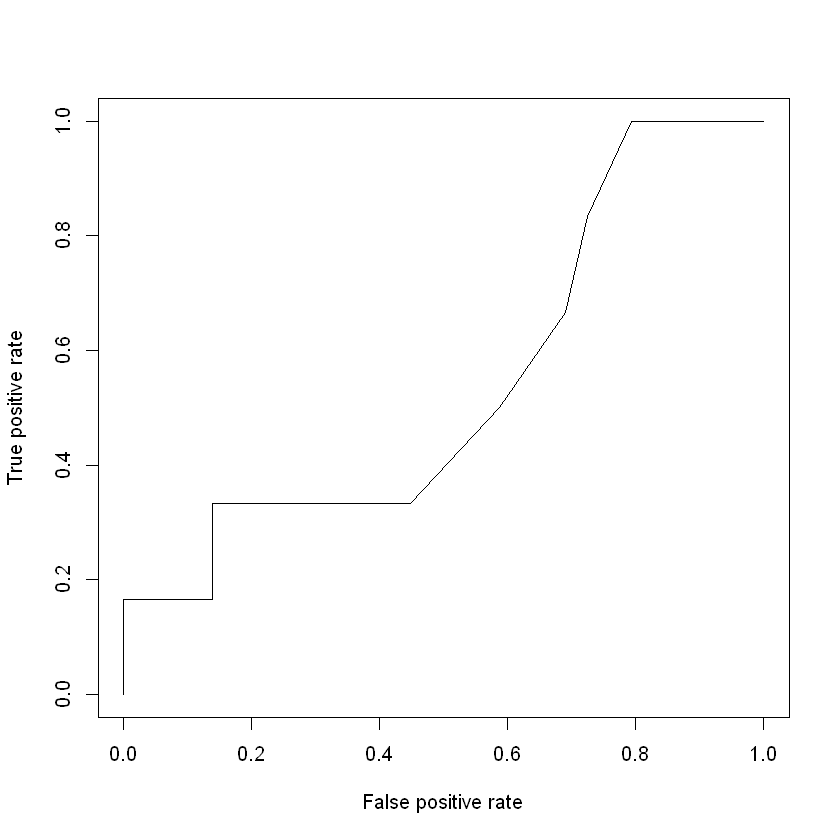

In [16]:
model <- glm(t1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0020  -0.6718  -0.4977  -0.3999   2.2653  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.5149     1.3248  -0.389    0.697
sexMale            -0.1889     0.8688  -0.217    0.828
definitionharmony  -0.9463     0.7729  -1.224    0.221
needharmony         0.4979     0.7299   0.682    0.495
purposecosmetic     0.1980     0.8199   0.241    0.809
purposeetc         -1.0794     0.8345  -1.293    0.196
interest           -0.1107     0.3038  -0.364    0.715

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.955  on 81  degrees of freedom
Residual deviance: 71.001  on 75  degrees of freedom
AIC: 85.001

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,74.95530,NA
sex,1,0.002704067,80,74.95260,0.9585282
definition,1,0.491089964,79,74.46151,0.4834415
need,1,0.407279328,78,74.05423,0.5233537
purpose,2,2.920874653,76,71.13336,0.2321347
interest,1,0.132655535,75,71.00070,0.7156944


[1] 0.4010417

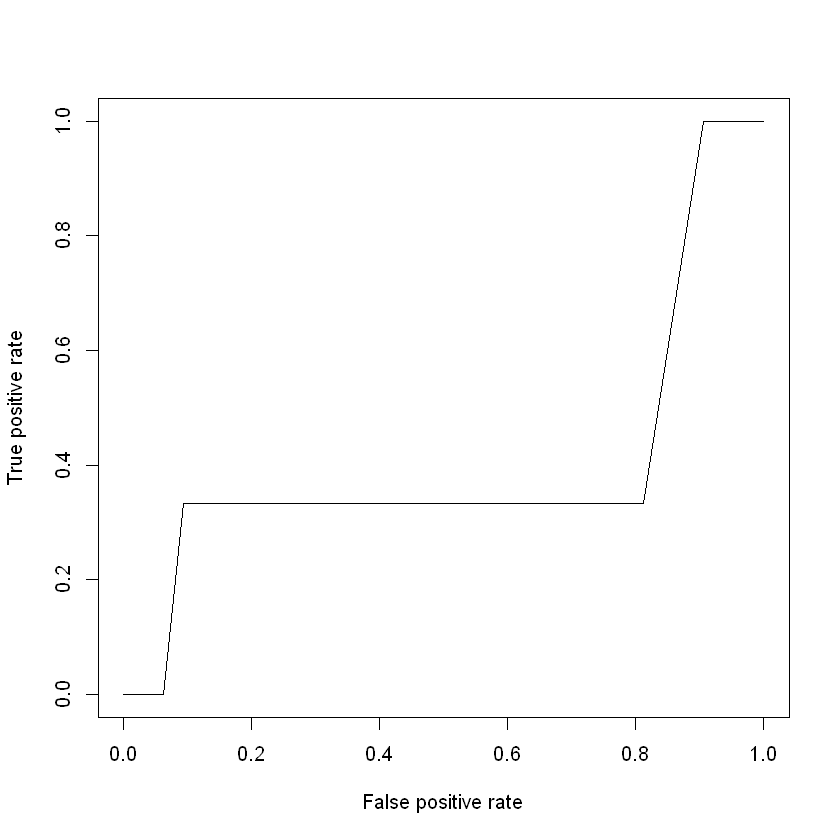

In [17]:
model <- glm(t1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4614  -0.9438  -0.7005   1.2464   1.8626  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.3780     1.2049  -1.974   0.0484 *
sexMale            -1.0997     0.7519  -1.463   0.1436  
definitionharmony   0.9663     0.6891   1.402   0.1608  
needharmony        -0.2641     0.5875  -0.450   0.6530  
purposecosmetic    -0.5273     0.7430  -0.710   0.4779  
purposeetc         -0.1371     0.6157  -0.223   0.8238  
interest            0.4117     0.2691   1.530   0.1260  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.920  on 81  degrees of freedom
Residual deviance:  98.302  on 75  degrees of freedom
AIC: 112.3

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,103.92012,NA
sex,1,1.2593010,80,102.66081,0.2617834
definition,1,1.3368464,79,101.32397,0.2475909
need,1,0.1293392,78,101.19463,0.7191182
purpose,2,0.4058208,76,100.78881,0.8163514
interest,1,2.4872978,75,98.30151,0.1147686


[1] 0.5592105

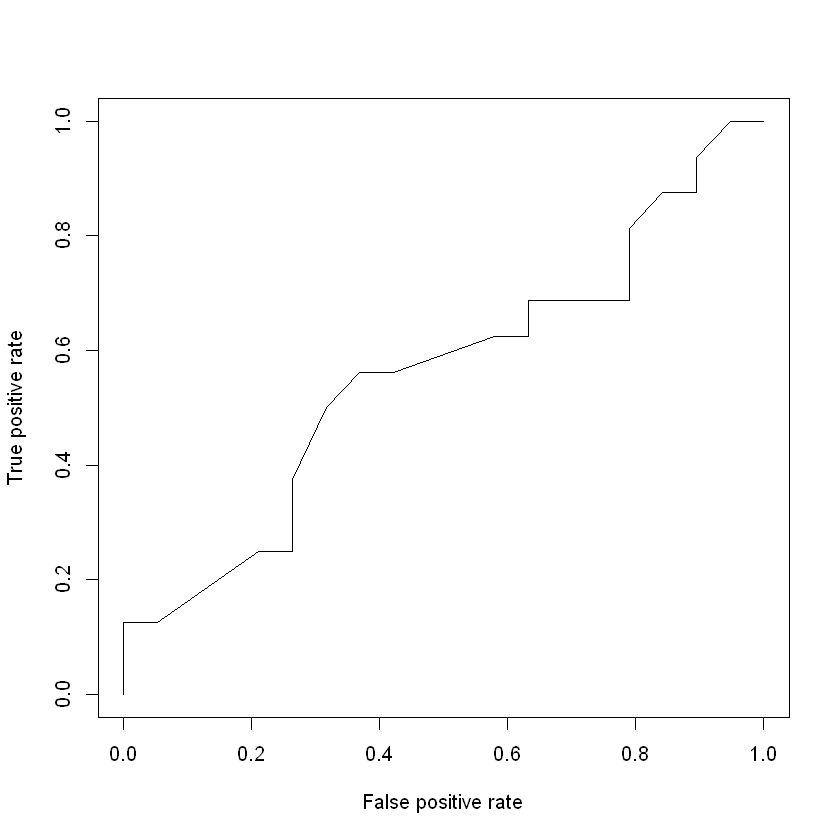

In [18]:
model <- glm(t1_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0721  -0.6949  -0.5560  -0.3353   2.1712  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.7629     1.4128  -1.248    0.212
sexMale            -0.8127     0.8263  -0.984    0.325
definitionharmony   1.0837     0.8777   1.235    0.217
needharmony        -0.5928     0.7112  -0.834    0.405
purposecosmetic    -1.8980     1.1720  -1.619    0.105
purposeetc         -0.3455     0.7062  -0.489    0.625
interest            0.1066     0.3142   0.339    0.735

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 78.032  on 81  degrees of freedom
Residual deviance: 73.141  on 75  degrees of freedom
AIC: 87.141

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,78.03164,NA
sex,1,0.04150766,80,77.99013,0.8385612
definition,1,0.75253853,79,77.23759,0.3856737
need,1,0.46884229,78,76.76875,0.4935203
purpose,2,3.51258551,76,73.25617,0.1726839
interest,1,0.11560129,75,73.14056,0.7338551


[1] 0.5606061

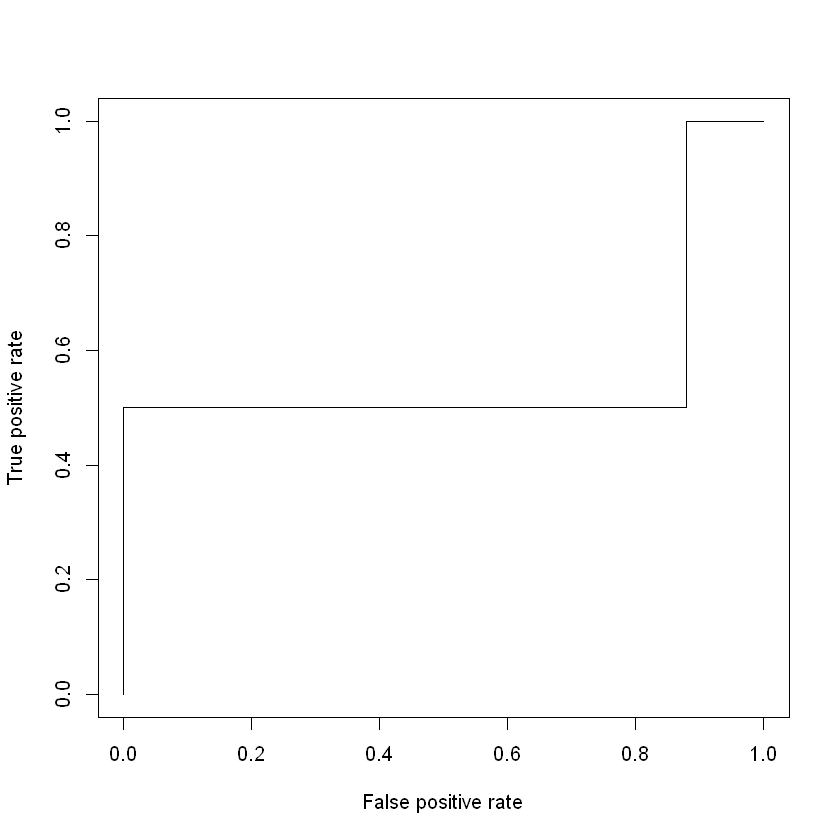

In [19]:
model <- glm(t1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1424  -0.7614  -0.6447  -0.4133   2.0808  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.25215    1.21079   0.208    0.835
sexMale           -0.95294    0.92070  -1.035    0.301
definitionharmony -0.71424    0.70151  -1.018    0.309
needharmony       -0.06621    0.65649  -0.101    0.920
purposecosmetic   -0.14785    0.79028  -0.187    0.852
purposeetc        -0.18827    0.67578  -0.279    0.781
interest          -0.18722    0.27929  -0.670    0.503

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 88.778  on 81  degrees of freedom
Residual deviance: 84.684  on 75  degrees of freedom
AIC: 98.684

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,88.77830,NA
sex,1,2.12643796,80,86.65186,0.1447769
definition,1,1.39618344,79,85.25568,0.2373636
need,1,0.01956628,78,85.23611,0.8887552
purpose,2,0.10040462,76,85.13571,0.9510370
interest,1,0.45127209,75,84.68444,0.5017315


[1] 0.6410256

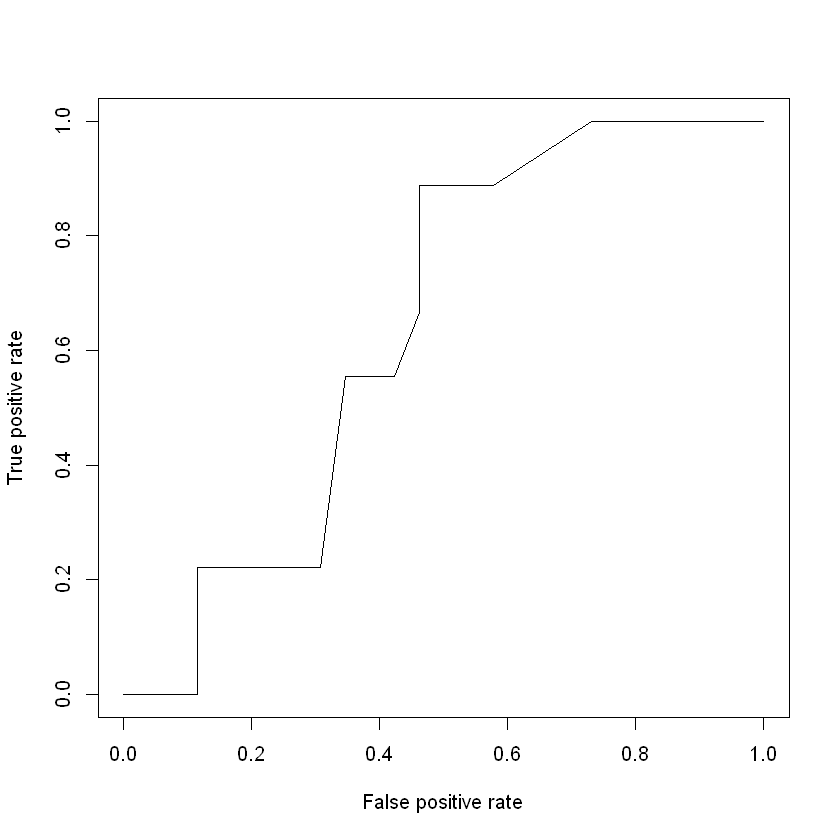

In [20]:
model <- glm(t2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0711  -0.8423  -0.7557   1.2970   1.9866  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.43081    1.17460  -1.218    0.223
sexMale           -0.21550    0.72977  -0.295    0.768
definitionharmony  0.68650    0.72502   0.947    0.344
needharmony        0.19331    0.60848   0.318    0.751
purposecosmetic    0.38167    0.73452   0.520    0.603
purposeetc        -0.24942    0.66758  -0.374    0.709
interest          -0.02867    0.25653  -0.112    0.911

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 97.320  on 81  degrees of freedom
Residual deviance: 94.367  on 75  degrees of freedom
AIC: 108.37

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,97.31980,NA
sex,1,0.000840463,80,97.31896,0.9768720
definition,1,2.068414331,79,95.25055,0.1503778
need,1,0.039375249,78,95.21117,0.8427071
purpose,2,0.831643046,76,94.37953,0.6597980
interest,1,0.012477573,75,94.36705,0.9110589


[1] 0.5133333

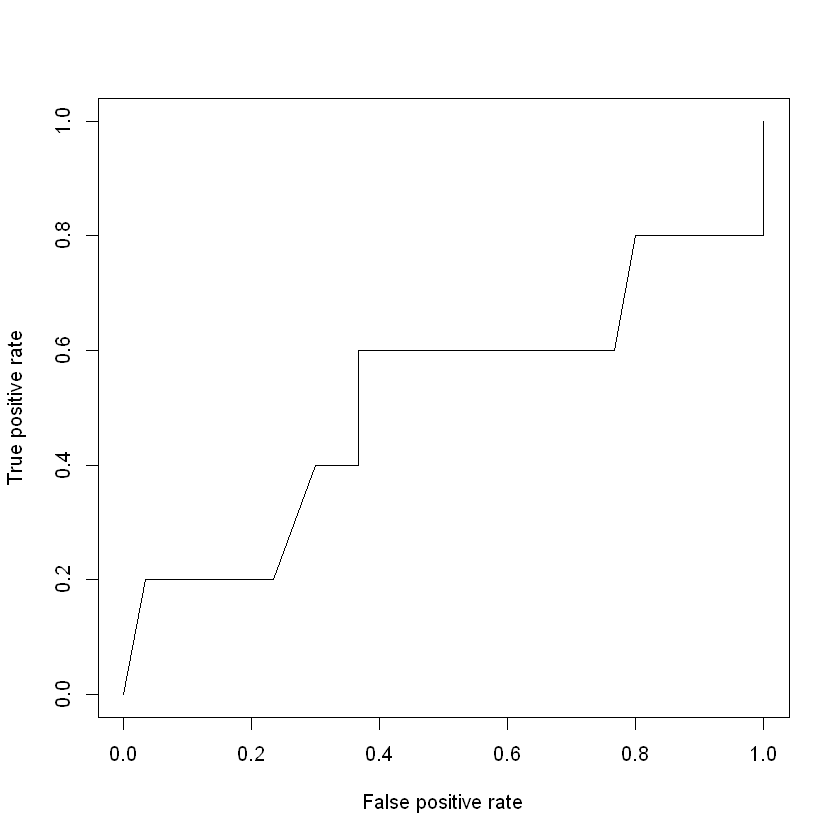

In [21]:
model <- glm(t2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0038  -0.7081  -0.5958  -0.4943   2.0465  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.71820    1.30008  -1.322    0.186
sexMale            0.60514    0.79372   0.762    0.446
definitionharmony -0.36429    0.76195  -0.478    0.633
needharmony        0.07438    0.68351   0.109    0.913
purposecosmetic   -0.44687    0.96284  -0.464    0.643
purposeetc        -0.02959    0.73572  -0.040    0.968
interest           0.12311    0.28881   0.426    0.670

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 80.945  on 81  degrees of freedom
Residual deviance: 79.137  on 75  degrees of freedom
AIC: 93.137

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,80.94469,NA
sex,1,0.94197479,80,80.00272,0.3317705
definition,1,0.38433584,79,79.61838,0.5352919
need,1,0.02882834,78,79.58955,0.8651760
purpose,2,0.26862463,76,79.32093,0.8743170
interest,1,0.18350622,75,79.13742,0.6683772


[1] 0.6458333

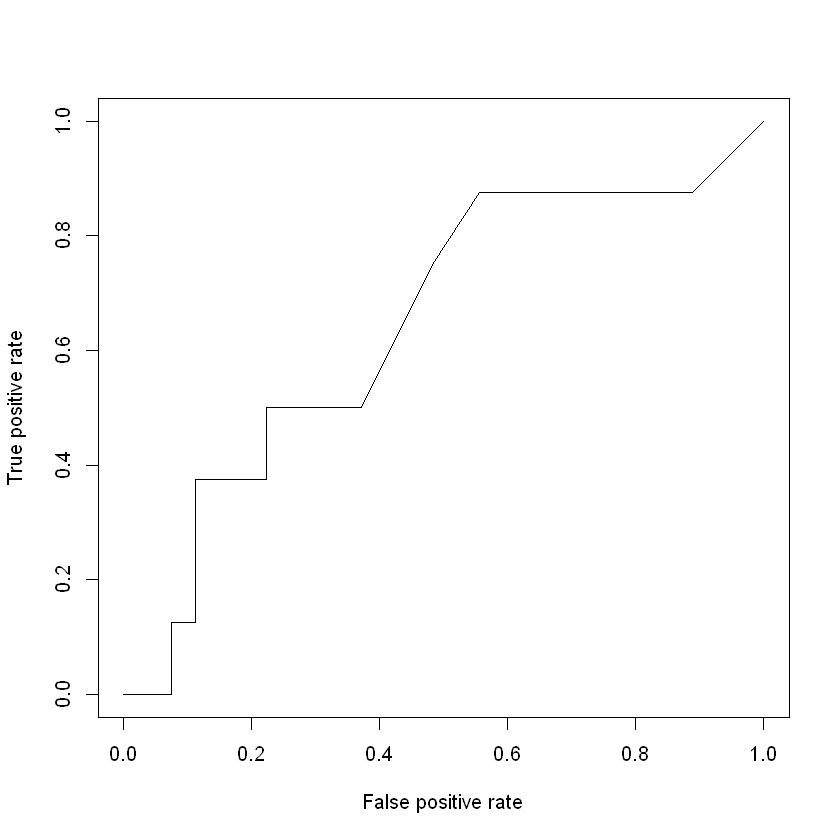

In [22]:
model <- glm(t2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9417  -0.6546  -0.5927  -0.4868   2.0936  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.12991    1.32316  -0.854    0.393
sexMale            0.23234    0.83094   0.280    0.780
definitionharmony  0.70309    0.85461   0.823    0.411
needharmony       -0.47474    0.69014  -0.688    0.492
purposecosmetic    0.05866    0.88963   0.066    0.947
purposeetc         0.02924    0.78534   0.037    0.970
interest          -0.19449    0.29464  -0.660    0.509

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 78.032  on 81  degrees of freedom
Residual deviance: 76.407  on 75  degrees of freedom
AIC: 90.407

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,78.03164,NA
sex,1,0.229820522,80,77.80182,0.6316569
definition,1,0.472888490,79,77.32893,0.4916613
need,1,0.483993945,78,76.84494,0.4866188
purpose,2,0.002226111,76,76.84271,0.9988876
interest,1,0.435648240,75,76.40706,0.5092304


[1] 0.2083333

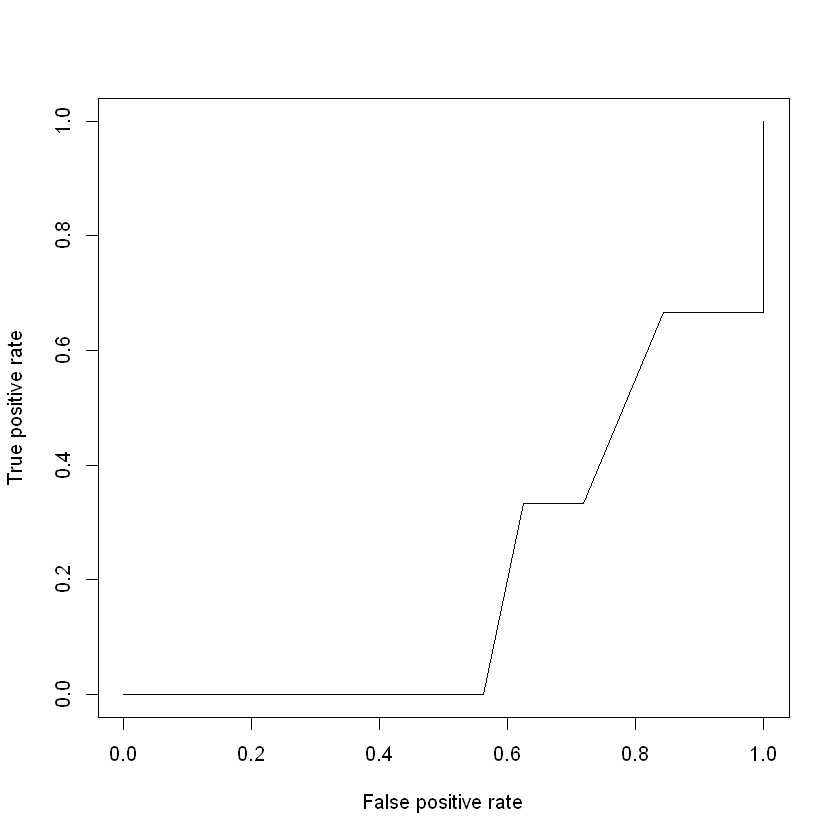

In [23]:
model <- glm(t2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8783  -0.5054  -0.4008  -0.3157   2.4471  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -4.3792     1.8565  -2.359   0.0183 *
sexMale             0.2821     1.1143   0.253   0.8001  
definitionharmony  -0.2255     0.9929  -0.227   0.8204  
needharmony         0.3892     0.9501   0.410   0.6821  
purposecosmetic    -0.1902     1.3520  -0.141   0.8881  
purposeetc          0.7857     0.9577   0.820   0.4120  
interest            0.4788     0.4011   1.194   0.2326  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 56.745  on 81  degrees of freedom
Residual deviance: 53.324  on 75  degrees of freedom
AIC: 67.324

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,56.74484,NA
sex,1,0.0004322511,80,56.74440,0.9834127
definition,1,0.1513692629,79,56.59303,0.6972303
need,1,0.3299361100,78,56.26310,0.5656967
purpose,2,1.4026188586,76,54.86048,0.4959355
interest,1,1.5367720602,75,53.32371,0.2150989


[1] 0.502

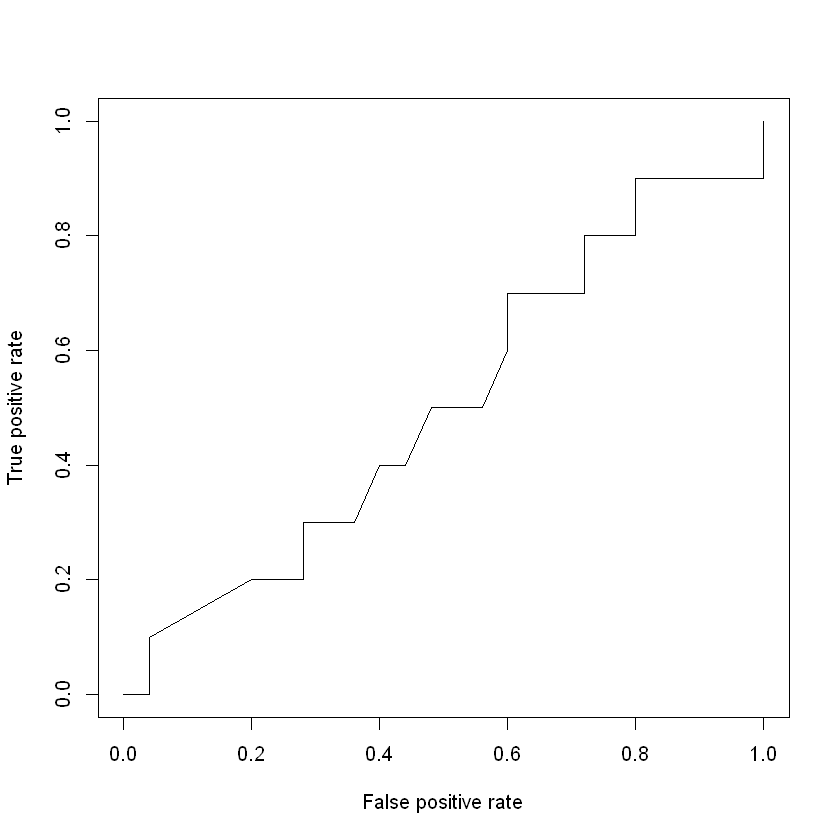

In [24]:
model <- glm(t2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9585  -0.8264  -0.6666   1.3770   1.8952  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.14599    1.16030  -0.988    0.323
sexMale            0.78136    0.75850   1.030    0.303
definitionharmony -0.19911    0.69842  -0.285    0.776
needharmony       -0.16022    0.62360  -0.257    0.797
purposecosmetic   -0.03258    0.86432  -0.038    0.970
purposeetc         0.63712    0.68548   0.929    0.353
interest          -0.01530    0.25627  -0.060    0.952

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.375  on 81  degrees of freedom
Residual deviance: 93.114  on 75  degrees of freedom
AIC: 107.11

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,95.37474,NA
sex,1,0.481332567,80,94.89341,0.4878193
definition,1,0.457993410,79,94.43542,0.4985633
need,1,0.029343187,78,94.40607,0.8639890
purpose,2,1.288837331,76,93.11723,0.5249676
interest,1,0.003561553,75,93.11367,0.9524115


[1] 0.5967742

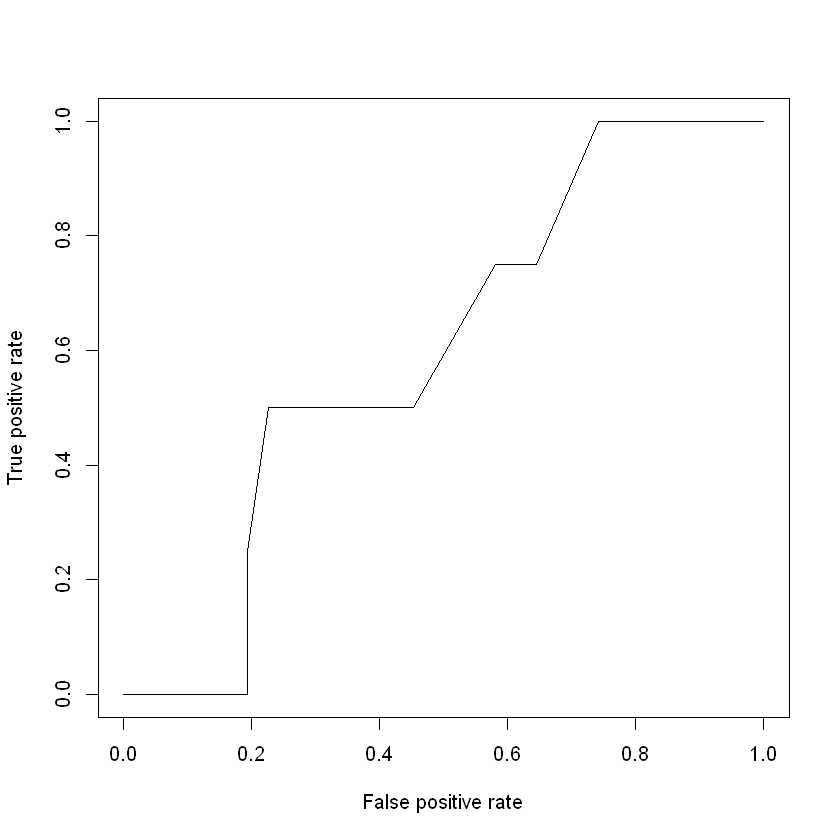

In [25]:
model <- glm(d1_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2215  -0.8904  -0.7381   1.1617   1.8251  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.32431    1.09634   0.296    0.767
sexMale           -0.65994    0.74466  -0.886    0.375
definitionharmony -0.40404    0.63109  -0.640    0.522
needharmony       -0.52758    0.56932  -0.927    0.354
purposecosmetic   -0.40296    0.73070  -0.551    0.581
purposeetc        -0.10808    0.61333  -0.176    0.860
interest          -0.03773    0.24791  -0.152    0.879

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 105.29  on 81  degrees of freedom
Residual deviance: 100.82  on 75  degrees of freedom
AIC: 114.82

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,105.2882,NA
sex,1,1.53870930,80,103.7495,0.2148100
definition,1,1.77360057,79,101.9759,0.1829371
need,1,0.80354494,78,101.1724,0.3700356
purpose,2,0.32646044,76,100.8459,0.8493956
interest,1,0.02315323,75,100.8228,0.8790593


[1] 0.5625

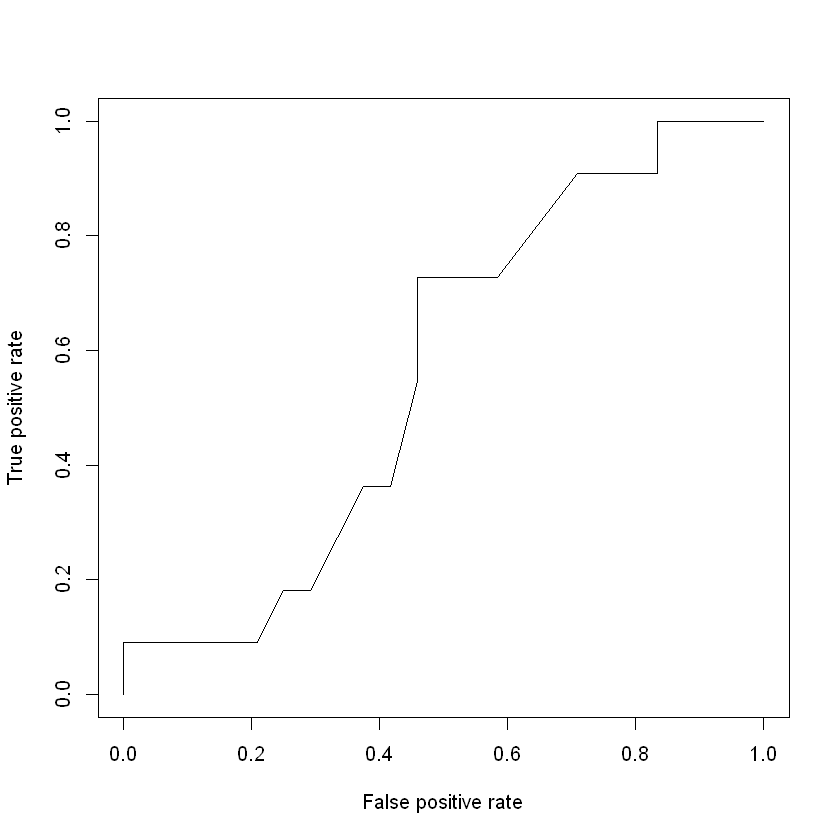

In [26]:
model <- glm(d1_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9146  -0.5189  -0.4549  -0.2921   2.1540  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -3.403401   1.614903  -2.107   0.0351 *
sexMale            1.148844   1.001800   1.147   0.2515  
definitionharmony -0.104637   0.969750  -0.108   0.9141  
needharmony        1.296128   0.922186   1.405   0.1599  
purposecosmetic    1.559792   1.050241   1.485   0.1375  
purposeetc         0.277666   1.009766   0.275   0.7833  
interest          -0.001518   0.322471  -0.005   0.9962  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.275  on 81  degrees of freedom
Residual deviance: 61.817  on 75  degrees of freedom
AIC: 75.817

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,68.27486,NA
sex,1,9.788593e-01,80,67.29600,0.3224806
definition,1,5.763416e-01,79,66.71966,0.4477499
need,1,1.929226e+00,78,64.79044,0.1648431
purpose,2,2.973203e+00,76,61.81723,0.2261399
interest,1,2.216044e-05,75,61.81721,0.9962440


[1] 0.5967742

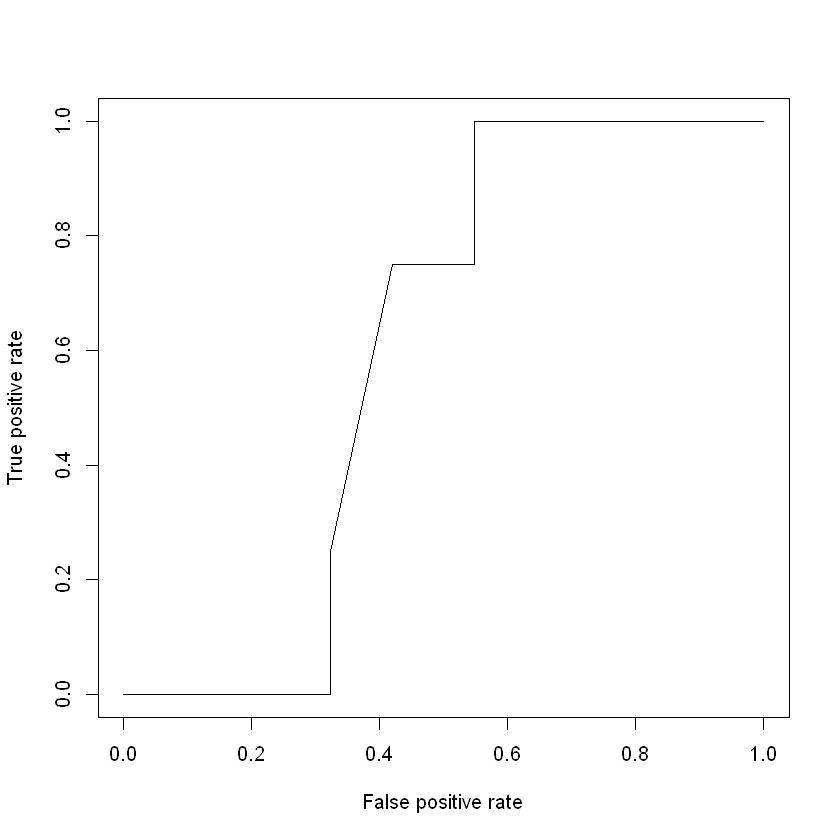

In [27]:
model <- glm(d1_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.84467  -0.58319  -0.46187  -0.00014   2.15584  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)         -2.1994     1.6796  -1.309    0.190
sexMale             -0.9762     0.9401  -1.038    0.299
definitionharmony    0.6265     1.0178   0.616    0.538
needharmony          0.1423     0.8701   0.164    0.870
purposecosmetic    -17.3671  1616.8733  -0.011    0.991
purposeetc          -0.6049     0.7808  -0.775    0.438
interest             0.1167     0.3690   0.316    0.752

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60.810  on 81  degrees of freedom
Residual deviance: 54.347  on 75  degrees of freedom
AIC: 68.347

Number of Fisher Scoring iterations: 17


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,60.81033,NA
sex,1,0.02579746,80,60.78454,0.87239594
definition,1,0.46836024,79,60.31618,0.49374251
need,1,0.07717403,78,60.23900,0.78116424
purpose,2,5.79160440,76,54.44740,0.05525468
interest,1,0.10018828,75,54.34721,0.75160381


[1] 0.4270833

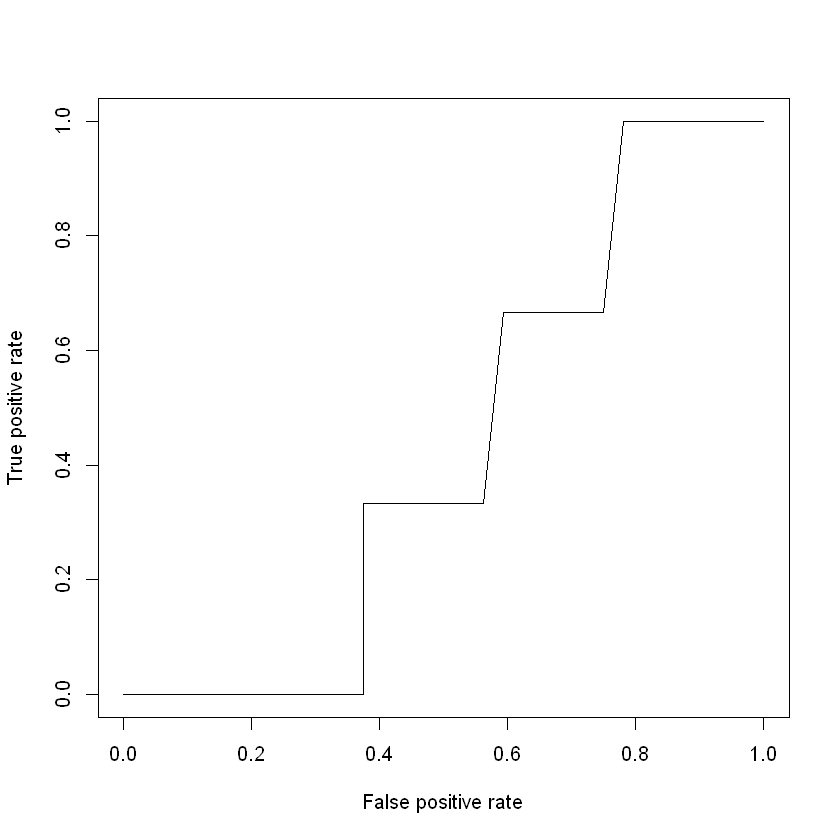

In [28]:
model <- glm(d1_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2216  -0.9514  -0.8085   1.2678   1.7856  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.79606    1.07753  -0.739    0.460
sexMale           -0.29527    0.69484  -0.425    0.671
definitionharmony  0.39244    0.64088   0.612    0.540
needharmony       -0.75868    0.56264  -1.348    0.178
purposecosmetic   -0.48846    0.73050  -0.669    0.504
purposeetc        -0.07168    0.60370  -0.119    0.905
interest           0.16901    0.24328   0.695    0.487

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 107.70  on 81  degrees of freedom
Residual deviance: 104.93  on 75  degrees of freedom
AIC: 118.93

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,107.7008,NA
sex,1,0.10616238,80,107.5946,0.7445562
definition,1,0.04815161,79,107.5465,0.8263114
need,1,1.63105598,78,105.9154,0.2015571
purpose,2,0.49996369,76,105.4154,0.7788149
interest,1,0.48893602,75,104.9265,0.4844023


[1] 0.4778912

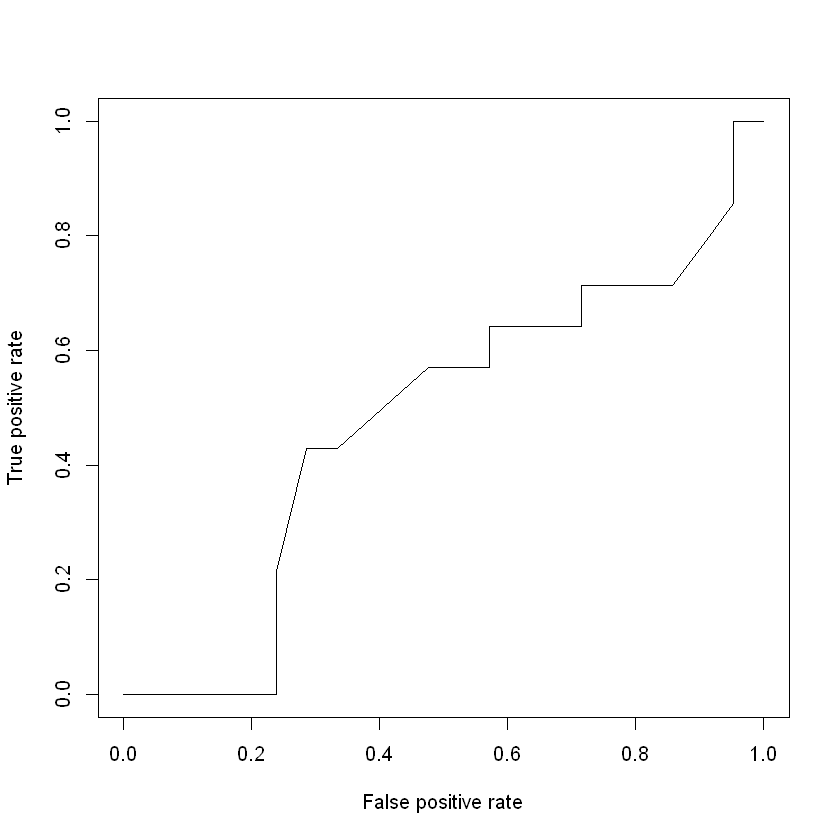

In [29]:
model <- glm(d2_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0631  -0.7371  -0.5493  -0.3965   2.3128  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.72204    1.26825   0.569    0.569
sexMale           -1.31996    0.91502  -1.443    0.149
definitionharmony -0.42343    0.75994  -0.557    0.577
needharmony        0.07978    0.70406   0.113    0.910
purposecosmetic   -1.27388    0.91700  -1.389    0.165
purposeetc        -0.54566    0.66919  -0.815    0.415
interest          -0.33230    0.29610  -1.122    0.262

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.702  on 81  degrees of freedom
Residual deviance: 78.567  on 75  degrees of freedom
AIC: 92.567

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,83.70236,NA
sex,1,1.44726289,80,82.25509,0.2289677
definition,1,0.19698362,79,82.05811,0.6571667
need,1,0.01671926,78,82.04139,0.8971179
purpose,2,2.20123854,76,79.84015,0.3326650
interest,1,1.27354445,75,78.56661,0.2591028


[1] 0.7540323

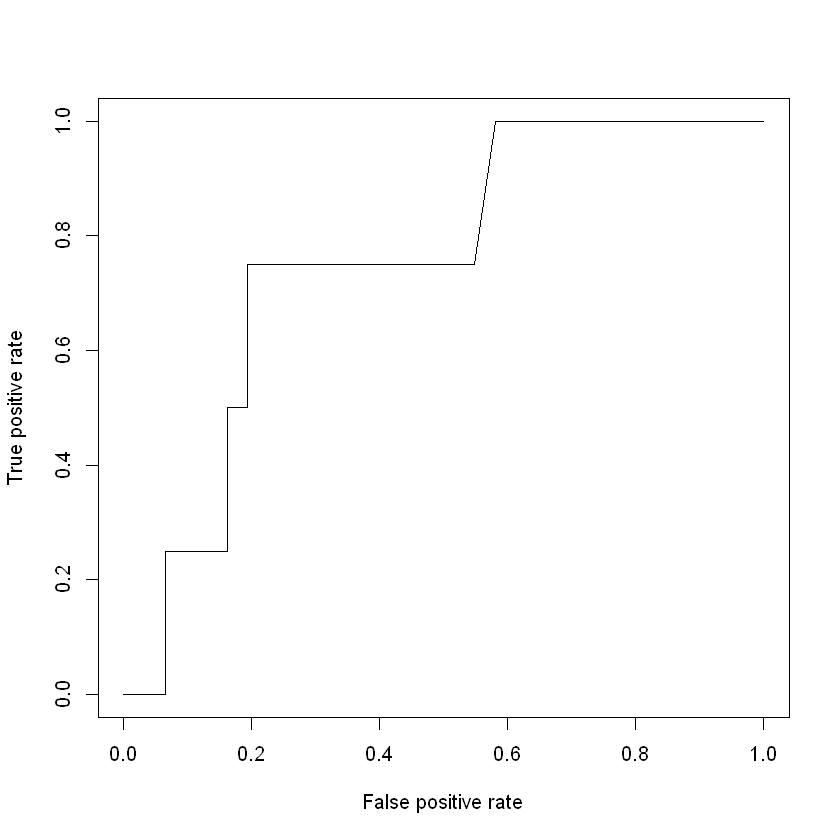

In [30]:
model <- glm(d2_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0427  -0.6864  -0.3840  -0.2059   2.4757  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.4244     1.7510  -1.956   0.0505 .
sexMale             1.0753     0.9894   1.087   0.2771  
definitionharmony  -0.7056     1.0809  -0.653   0.5139  
needharmony         2.3216     1.2891   1.801   0.0717 .
purposecosmetic    -0.1248     1.3457  -0.093   0.9261  
purposeetc          0.9077     0.9492   0.956   0.3390  
interest           -0.1000     0.3414  -0.293   0.7696  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64.648  on 81  degrees of freedom
Residual deviance: 56.821  on 75  degrees of freedom
AIC: 70.821

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,64.64772,NA
sex,1,1.39184679,80,63.25587,0.23809347
definition,1,0.26254695,79,62.99332,0.60837574
need,1,4.67208089,78,58.32124,0.03065676
purpose,2,1.41462941,76,56.90661,0.49296618
interest,1,0.08579135,75,56.82082,0.76959737


[1] 0.6370968

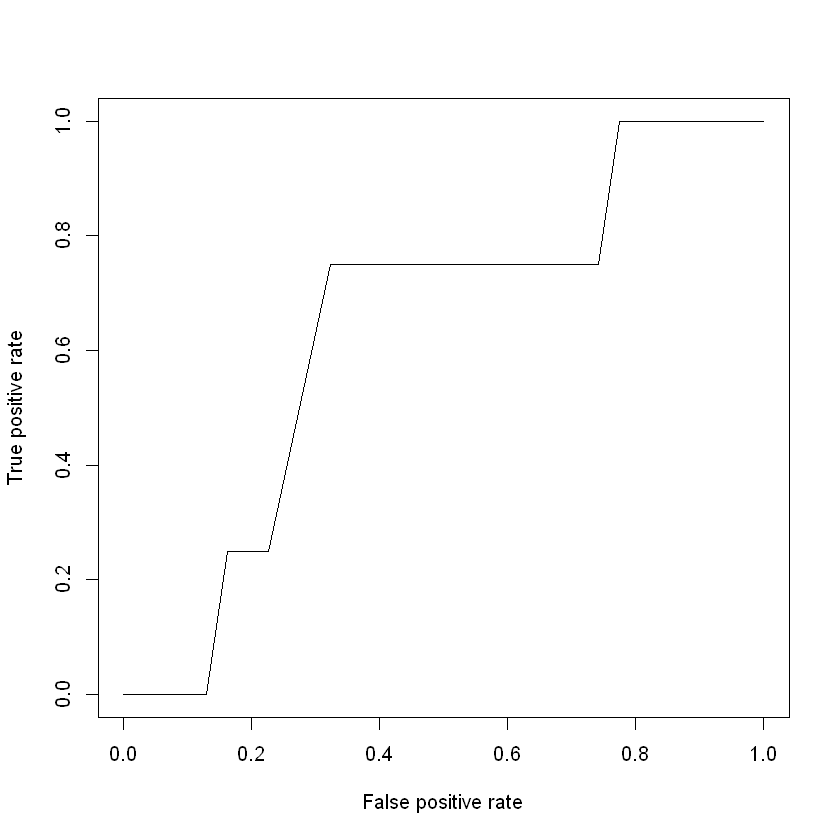

In [31]:
model <- glm(d2_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1179  -0.5745  -0.5014  -0.4124   2.2301  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -0.928243   1.396201  -0.665   0.5062  
sexMale           -0.029108   1.041511  -0.028   0.9777  
definitionharmony -0.000302   0.835388   0.000   0.9997  
needharmony       -0.176468   0.734024  -0.240   0.8100  
purposecosmetic    1.547333   0.897448   1.724   0.0847 .
purposeetc         0.165235   0.901921   0.183   0.8546  
interest          -0.292009   0.315087  -0.927   0.3541  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.955  on 81  degrees of freedom
Residual deviance: 68.933  on 75  degrees of freedom
AIC: 82.933

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,74.95530,NA
sex,1,0.62741963,80,74.32788,0.4283034
definition,1,0.02450294,79,74.30338,0.8756120
need,1,0.19999871,78,74.10338,0.6547219
purpose,2,4.29549990,76,69.80788,0.1167465
interest,1,0.87474680,75,68.93314,0.3496445


[1] 0.4652778

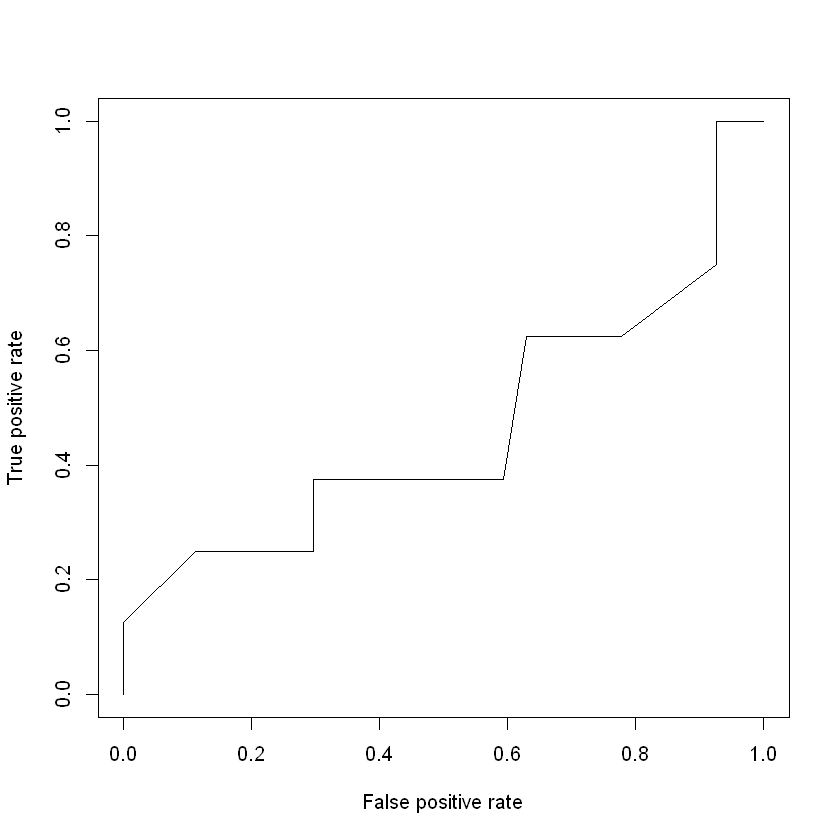

In [32]:
model <- glm(d2_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9595  -0.5148  -0.4097  -0.3117   2.3496  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -4.76959    1.83432  -2.600  0.00932 **
sexMale            1.08096    0.99359   1.088  0.27663   
definitionharmony  0.32638    0.98200   0.332  0.73962   
needharmony        0.13279    0.82520   0.161  0.87216   
purposecosmetic    0.47179    1.13474   0.416  0.67758   
purposeetc         0.09297    0.99504   0.093  0.92556   
interest           0.53852    0.37993   1.417  0.15636   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60.81  on 81  degrees of freedom
Residual deviance: 56.27  on 75  degrees of freedom
AIC: 70.27

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,60.81033,NA
sex,1,1.91637857,80,58.89395,0.1662564
definition,1,0.05956039,79,58.83439,0.8071921
need,1,0.05114968,78,58.78324,0.8210747
purpose,2,0.30617581,76,58.47707,0.8580543
interest,1,2.20731108,75,56.26976,0.1373579


[1] 0.39

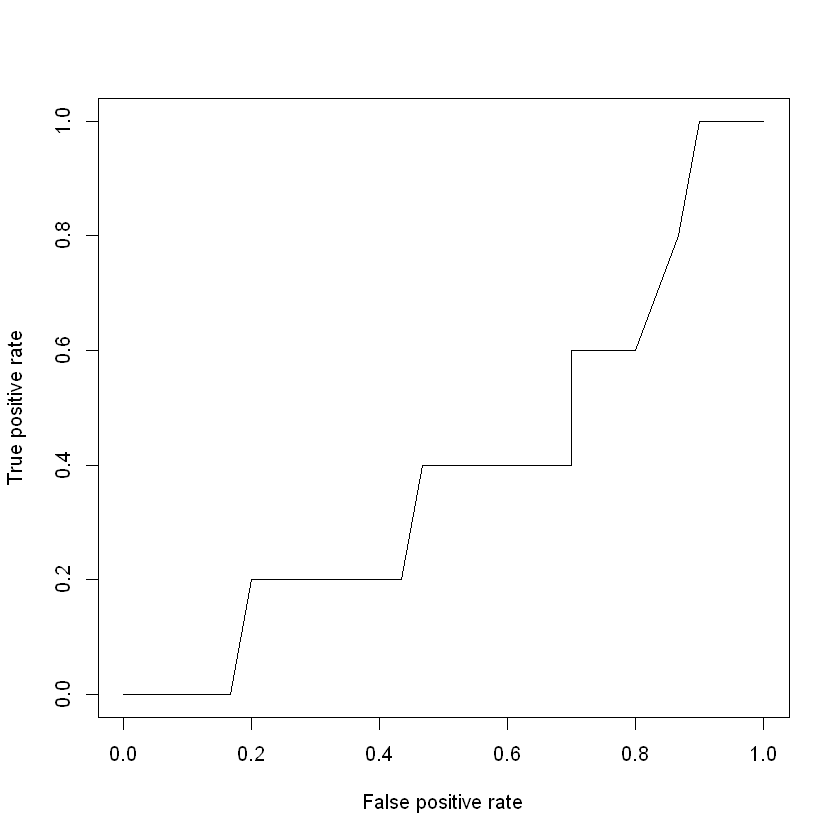

In [33]:
model <- glm(d2_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_1 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3448  -0.6758  -0.4388  -0.2833   2.2346  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -2.7237     1.4490  -1.880   0.0602 .
sexMale            -0.3375     1.0007  -0.337   0.7359  
definitionharmony  -0.2308     0.7500  -0.308   0.7582  
needharmony        -0.8883     0.6777  -1.311   0.1899  
purposecosmetic     1.3706     0.8299   1.651   0.0986 .
purposeetc         -0.5374     0.8516  -0.631   0.5280  
interest            0.4923     0.3333   1.477   0.1396  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 80.945  on 81  degrees of freedom
Residual deviance: 69.302  on 75  degrees of freedom
AIC: 83.302

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,80.94469,NA
sex,1,1.1456071,80,79.79908,0.28447062
definition,1,0.4420626,79,79.35702,0.50612862
need,1,1.8909006,78,77.46612,0.16910038
purpose,2,5.8196175,76,71.64650,0.05448615
interest,1,2.3442034,75,69.30230,0.12574983


[1] 0.71875

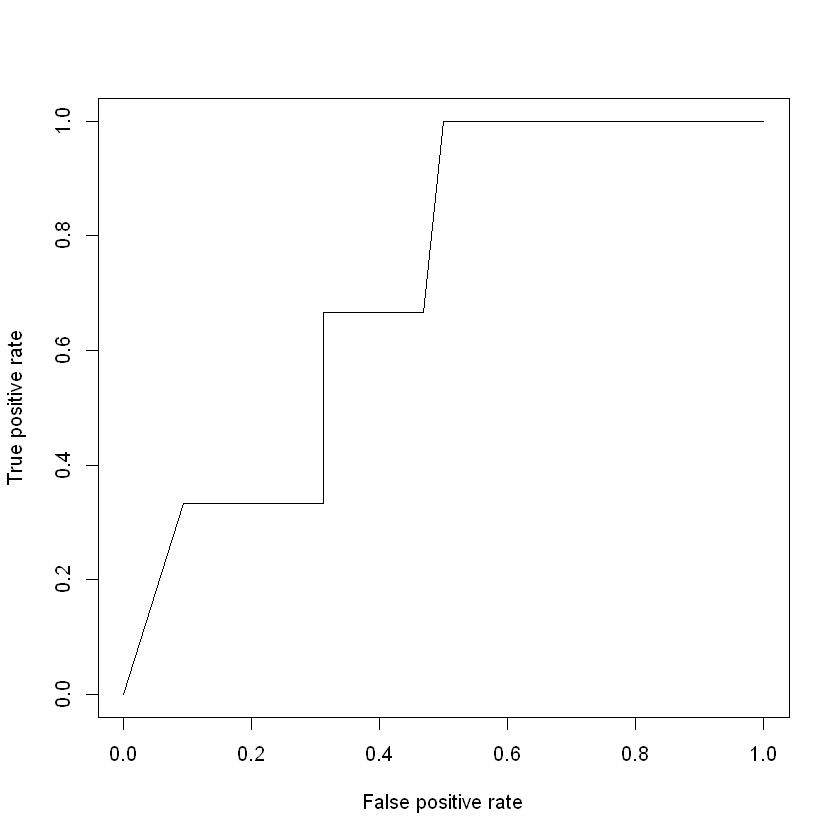

In [34]:
model <- glm(d3_1 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_2 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1011  -0.7738  -0.6593  -0.2833   2.2918  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.1187     1.2293   0.097    0.923
sexMale             0.2520     0.7273   0.346    0.729
definitionharmony  -0.3536     0.7680  -0.460    0.645
needharmony         0.3819     0.6858   0.557    0.578
purposecosmetic    -1.7980     1.1580  -1.553    0.121
purposeetc         -0.3277     0.6662  -0.492    0.623
interest           -0.2906     0.2783  -1.044    0.296

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 88.778  on 81  degrees of freedom
Residual deviance: 82.724  on 75  degrees of freedom
AIC: 96.724

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,88.77830,NA
sex,1,1.26165292,80,87.51665,0.2613384
definition,1,0.01530553,79,87.50134,0.9015405
need,1,0.34877640,78,87.15256,0.5548066
purpose,2,3.32765253,76,83.82491,0.1894128
interest,1,1.10110190,75,82.72381,0.2940244


[1] 0.6354167

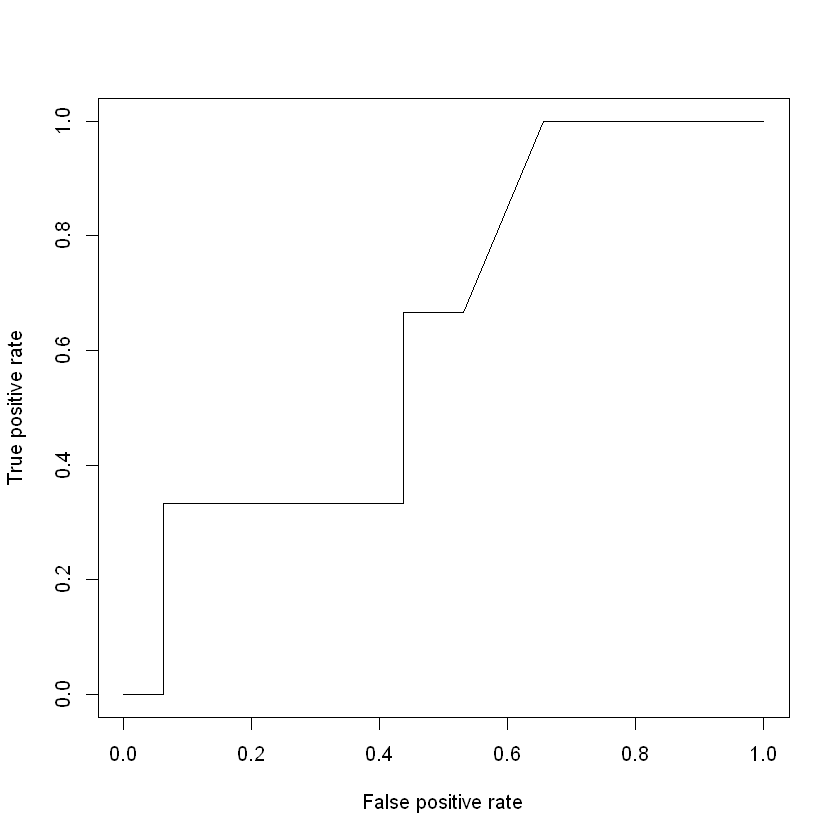

In [35]:
model <- glm(d3_2 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_3 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2177  -0.6556  -0.5402  -0.3969   2.1764  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.3955     1.4912  -2.277   0.0228 *
sexMale             0.9157     0.9472   0.967   0.3337  
definitionharmony   0.3693     0.9026   0.409   0.6824  
needharmony         0.2879     0.7864   0.366   0.7143  
purposecosmetic     0.4190     1.1014   0.380   0.7036  
purposeetc          1.1365     0.8821   1.288   0.1976  
interest            0.1561     0.3083   0.506   0.6126  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.955  on 81  degrees of freedom
Residual deviance: 71.551  on 75  degrees of freedom
AIC: 85.551

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,74.95530,NA
sex,1,0.4108245,80,74.54448,0.5215513
definition,1,0.2167133,79,74.32777,0.6415557
need,1,0.2906931,78,74.03707,0.5897767
purpose,2,2.2258673,76,71.81121,0.3285936
interest,1,0.2599547,75,71.55125,0.6101513


[1] 0.4178322

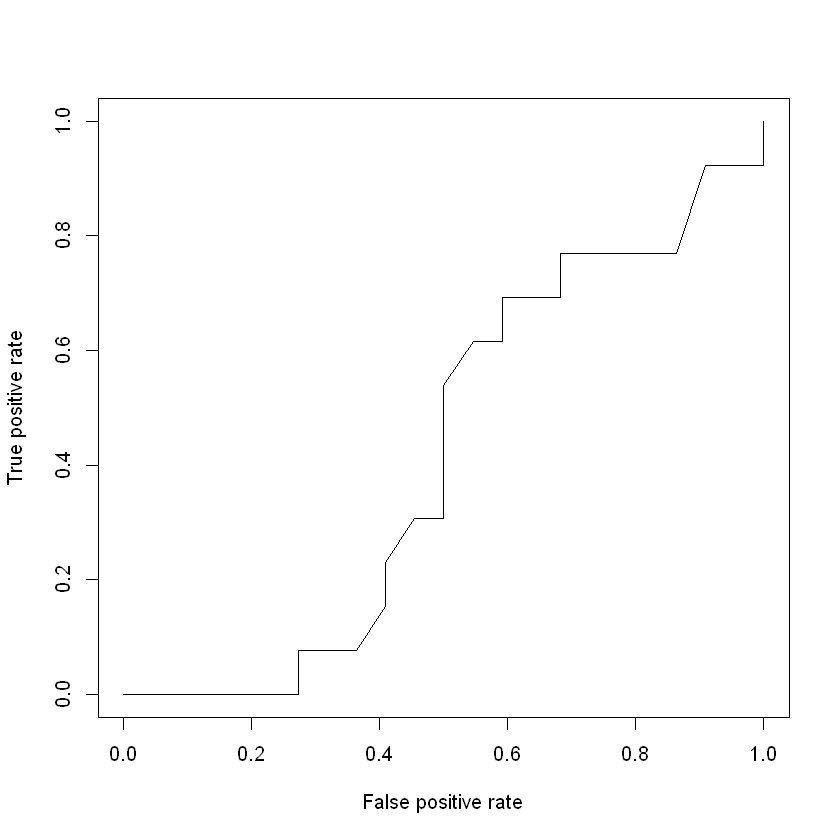

In [36]:
model <- glm(d3_3 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_4 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7136  -0.5750  -0.5192  -0.3664   2.4149  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.06073    1.48719  -0.713    0.476
sexMale           -0.40014    0.97678  -0.410    0.682
definitionharmony -0.22619    0.88164  -0.257    0.798
needharmony       -0.25188    0.80072  -0.315    0.753
purposecosmetic   -1.14413    1.20606  -0.949    0.343
purposeetc        -0.10156    0.79296  -0.128    0.898
interest          -0.05913    0.34218  -0.173    0.863

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64.648  on 81  degrees of freedom
Residual deviance: 62.918  on 75  degrees of freedom
AIC: 76.918

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,64.64772,NA
sex,1,0.10942066,80,64.53830,0.7408047
definition,1,0.33367239,79,64.20462,0.5635046
need,1,0.06134894,78,64.14328,0.8043765
purpose,2,1.19524621,76,62.94803,0.5501177
interest,1,0.02978958,75,62.91824,0.8629685


[1] 0.3125

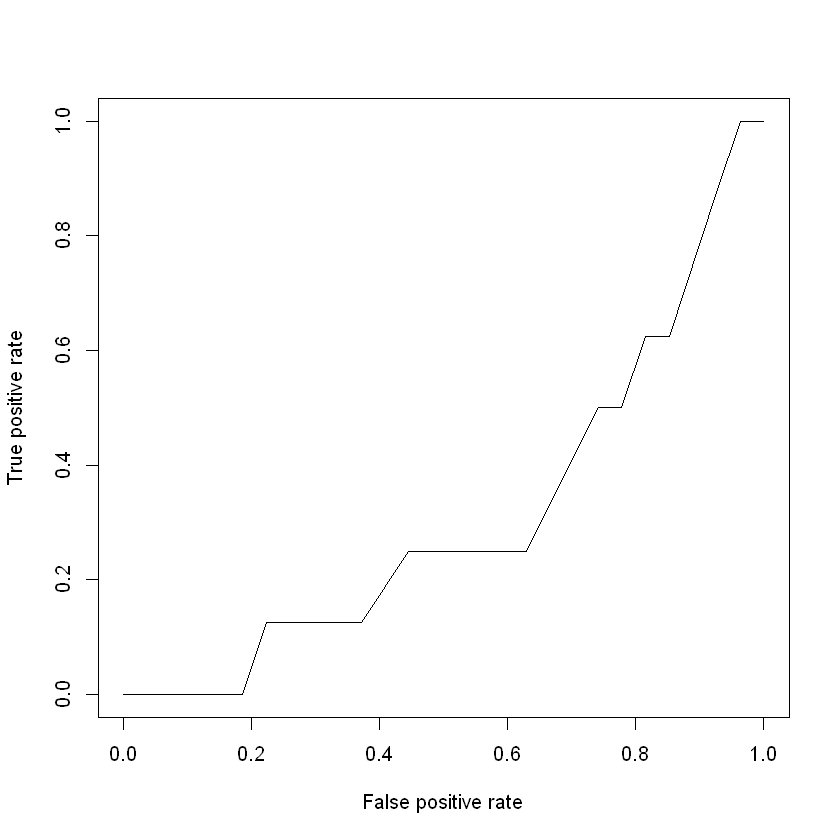

In [37]:
model <- glm(d3_4 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_5 ~ sex + definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9694  -0.8272  -0.7174   1.3902   1.8792  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.75145    1.15404  -0.651    0.515
sexMale           -0.44010    0.76284  -0.577    0.564
definitionharmony  0.24798    0.70988   0.349    0.727
needharmony        0.29196    0.62607   0.466    0.641
purposecosmetic    0.13623    0.74928   0.182    0.856
purposeetc        -0.07712    0.65681  -0.117    0.907
interest          -0.14988    0.25828  -0.580    0.562

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.375  on 81  degrees of freedom
Residual deviance: 93.841  on 75  degrees of freedom
AIC: 107.84

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,81,95.37474,NA
sex,1,0.2566751,80,95.11807,0.6124137
definition,1,0.6635051,79,94.45456,0.4153252
need,1,0.1774376,78,94.27712,0.6735847
purpose,2,0.0996099,76,94.17751,0.9514150
interest,1,0.3365909,75,93.84092,0.5618037


[1] 0.3981481

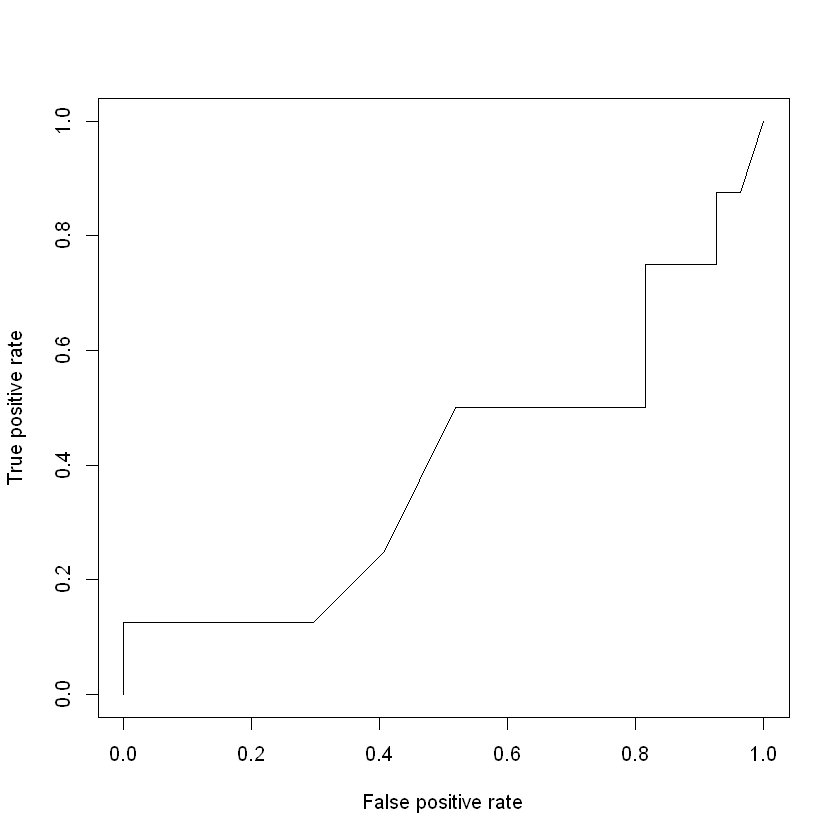

In [38]:
model <- glm(d3_5 ~ sex + definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc